In [39]:
# Install TensorFlow
!pip install tensorflow


In [40]:
# Import all necessary Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [41]:
#Load and Preprocess Data

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


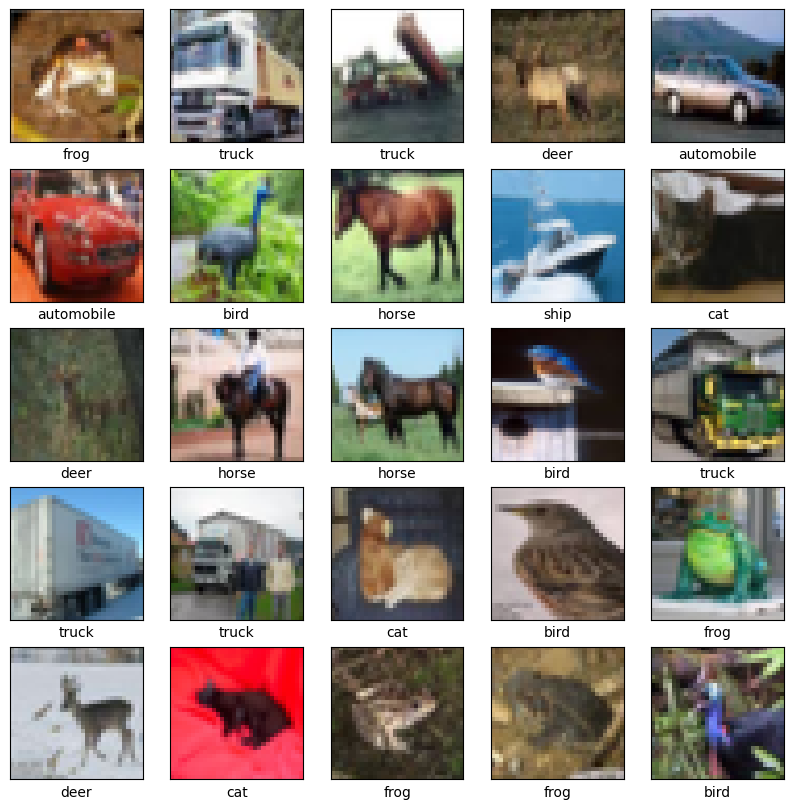

In [42]:
#Visualize the Data

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the first 25 images from the training set and display the class name below each image
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [43]:
# Build the Convolutional Neural Network (CNN)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [12]:
# Compile the Mode

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [19]:
# Train the Mode

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.5152 - accuracy: 0.8167 - val_loss: 0.9053 - val_accuracy: 0.7193
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.4803 - accuracy: 0.8304 - val_loss: 0.9281 - val_accuracy: 0.7140
Epoch 3/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.4497 - accuracy: 0.8420 - val_loss: 0.9158 - val_accuracy: 0.7173
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.4196 - accuracy: 0.8508 - val_loss: 0.9819 - val_accuracy: 0.7123
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.3934 - accuracy: 0.8602 - val_loss: 1.0891 - val_accuracy: 0.7023
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.3653 - accuracy: 0.8693 - val_loss: 1.0580 - val_accuracy: 0.7116
Epoch 7/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.3384 - accuracy: 0.8790 - val_loss: 1.1267 -

In [22]:
# Evaluate the Model

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 3s - loss: 1.3108 - accuracy: 0.7069 - 3s/epoch - 11ms/step
Test accuracy: 0.7069000005722046


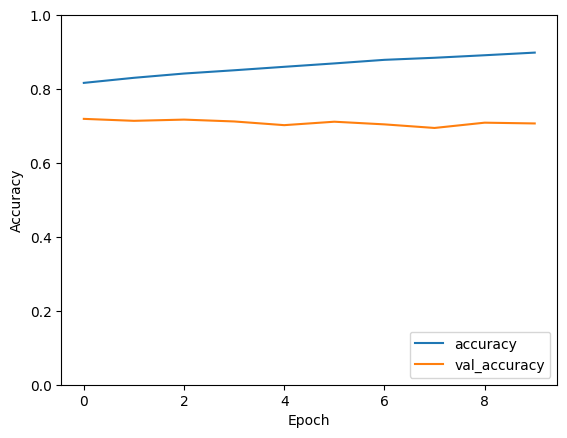

In [23]:
# Plot Training and Validation Accuracy

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()



In [25]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [26]:
print("Training data shape:", train_images.shape)
print("Test data shape:", test_images.shape)
print("Pixel range:", train_images.min(), "-", train_images.max())


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Pixel range: 0.0 - 1.0


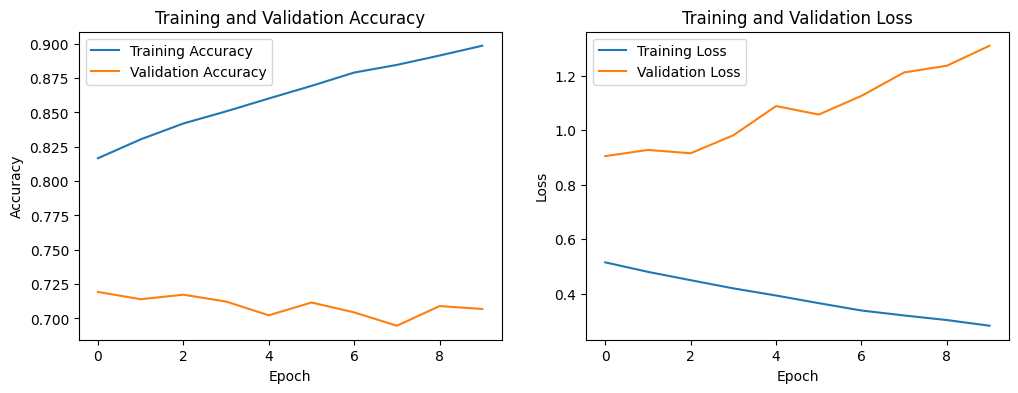

In [27]:
history.history.keys()  # to check available metrics

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')


313/313 - 3s - loss: 1.3108 - accuracy: 0.7069 - 3s/epoch - 11ms/step
Test accuracy: 0.7069
Test loss: 1.3108


In [29]:
# Predict the class of the first 10 images in the test set
predictions = model.predict(test_images[:10])

# Convert logits to probabilities
probabilities = tf.nn.softmax(predictions)
predicted_labels = tf.argmax(probabilities, axis=1)
actual_labels = test_labels[:10].flatten()

print("Predicted labels:", predicted_labels.numpy())
print("Actual labels:", actual_labels)


1/1 [==============================] - 0s 240ms/step
Predicted labels: [3 8 8 0 6 6 1 6 3 1]
Actual labels: [3 8 8 0 6 6 1 6 3 1]


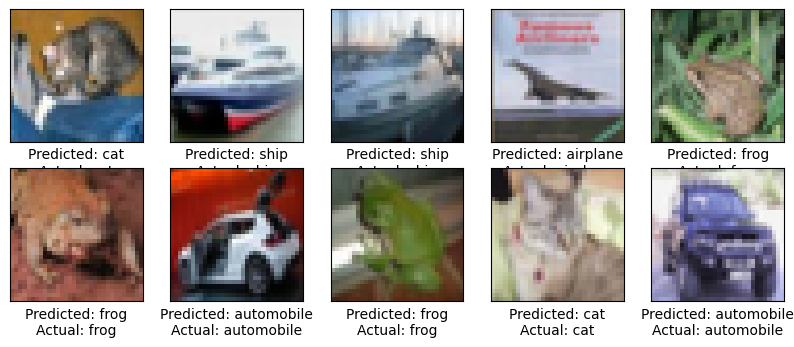

In [30]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(f"Predicted: {class_names[predicted_labels[i]]}\nActual: {class_names[actual_labels[i]]}")
plt.show()


In [31]:
# Save the model
model.save('cifar10_model.h5')

# Load the model
new_model = tf.keras.models.load_model('cifar10_model.h5')
new_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [32]:
# Make predictions on the test set
predictions = model.predict(test_images)

# Convert logits to probabilities
probabilities = tf.nn.softmax(predictions)

# Get the predicted labels
predicted_labels = tf.argmax(probabilities, axis=1)

# Flatten the actual labels array for comparison
actual_labels = test_labels.flatten()


313/313 [==============================] - 6s 18ms/step


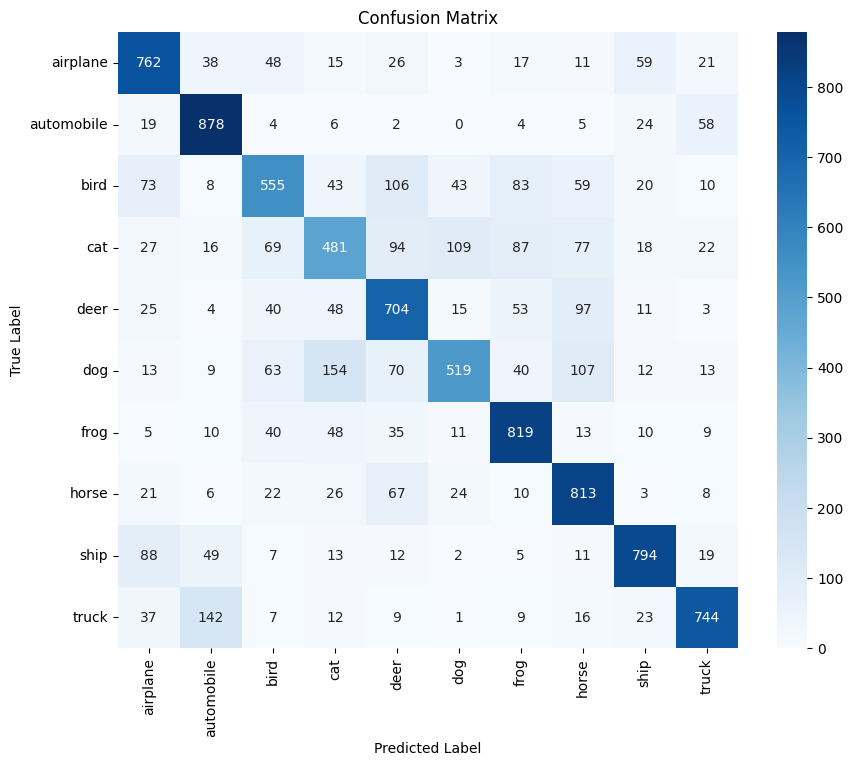

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
